In [2]:
import matplotlib.pyplot as plt
import nest
neuron = nest.Create("iaf_psc_alpha")
neuron2 = nest.Create("hh_psc_alpha")

<frozen importlib._bootstrap>:228: RuntimeWarning: compiletime version 3.8 of module 'pynestkernel' does not match runtime version 3.9



              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: nest-3.0
 Built: Aug 27 2021 11:09:20

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [3]:
neuron2.get()

{'Act_m': 0.05293248525724958,
 'Act_n': 0.3176769140606974,
 'archiver_length': 0,
 'beta_Ca': 0.001,
 'C_m': 100.0,
 'Ca': 0.0,
 'E_K': -77.0,
 'E_L': -54.402,
 'E_Na': 50.0,
 'element_type': 'neuron',
 'frozen': False,
 'g_K': 3600.0,
 'g_L': 30.0,
 'g_Na': 12000.0,
 'global_id': 2,
 'I_e': 0.0,
 'Inact_h': 0.5961207535084603,
 'local': True,
 'model': 'hh_psc_alpha',
 'node_uses_wfr': False,
 'post_trace': 0.0,
 'recordables': ('Act_m', 'Act_n', 'I_syn_ex', 'I_syn_in', 'Inact_h', 'V_m'),
 'synaptic_elements': {},
 't_ref': 2.0,
 't_spike': -1.0,
 'tau_Ca': 10000.0,
 'tau_minus': 20.0,
 'tau_minus_triplet': 110.0,
 'tau_syn_ex': 0.2,
 'tau_syn_in': 2.0,
 'thread': 0,
 'thread_local_id': -1,
 'V_m': -65.0,
 'vp': 0}

In [6]:
neuron.V_th = -23.0

In [35]:
neuron.get()

{'archiver_length': 0,
 'beta_Ca': 0.001,
 'C_m': 250.0,
 'Ca': 0.0,
 'E_L': -70.0,
 'element_type': 'neuron',
 'frozen': False,
 'global_id': 1,
 'I_e': 100.0,
 'local': True,
 'model': 'iaf_psc_alpha',
 'node_uses_wfr': False,
 'post_trace': 0.0,
 'recordables': ('I_syn_ex',
  'I_syn_in',
  'V_m',
  'weighted_spikes_ex',
  'weighted_spikes_in'),
 'synaptic_elements': {},
 't_ref': 2.0,
 't_spike': -1.0,
 'tau_Ca': 10000.0,
 'tau_m': 10.0,
 'tau_minus': 20.0,
 'tau_minus_triplet': 110.0,
 'tau_syn_ex': 2.0,
 'tau_syn_in': 2.0,
 'thread': 0,
 'thread_local_id': 0,
 'V_m': -66.00000000000003,
 'V_min': -inf,
 'V_reset': -70.0,
 'V_th': -23.0,
 'vp': 0}

In [50]:
neuron.I_e = 5000.0

In [51]:
multimeter = nest.Create("multimeter")
multimeter.set(record_from=["V_m"])

In [52]:
spikerecorder = nest.Create("spike_recorder")

In [53]:
nest.Connect(multimeter, neuron)
nest.Connect(neuron, spikerecorder)

In [54]:
nest.Simulate(1000.0)


Oct 28 16:20:43 NodeManager::prepare_nodes [Info]: 
    Preparing 18 nodes for simulation.

Oct 28 16:20:43 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 18
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Oct 28 16:20:43 SimulationManager::run [Info]: 
    Simulation finished.


In [55]:
dmm = multimeter.get()
Vms = dmm["events"]["V_m"]
ts = dmm["events"]["times"]

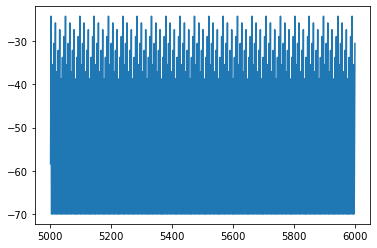

In [56]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(ts, Vms)

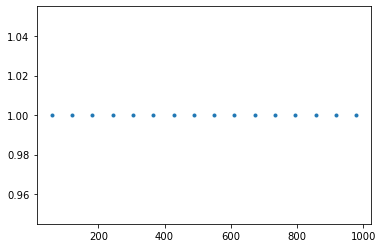

In [9]:
dSD = spikerecorder.get("events")
evs = dSD["senders"]
ts = dSD["times"]
plt.figure(2)
plt.plot(ts, evs, ".")
plt.show()